In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, optimizers
import json 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
with open('/kaggle/input/asl-signs/sign_to_prediction_index_map.json') as f:
    index_map = json.load(f)

In [3]:
train_df = pd.read_csv("/kaggle/input/asl-signs/train.csv")
train_df.head(2)

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait


In [4]:
train_df['sign_as_int'] = train_df['sign'].map(index_map)
train_df.head(3)

,path,participant_id,sequence_id,sign,sign_as_int
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow,25
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait,232
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud,48


In [5]:
sign_text= train_df.sign[2]
sam_df= pd.read_parquet('/kaggle/input/asl-signs/'+str(train_df.path[2]))
sam_df.head(3)

,frame,row_id,type,landmark_index,x,y,z
0,103,103-face-0,face,0,0.437886,0.437599,-0.051134
1,103,103-face-1,face,1,0.443258,0.392901,-0.067054
2,103,103-face-2,face,2,0.443997,0.409998,-0.042990


In [6]:
sam_df.type.unique()

array(['face', 'left_hand', 'pose', 'right_hand'], dtype=object)

In [7]:
#0~467
sam_df.landmark_index.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [8]:
hand_fingers_points =[(0,1),(1,2),(2,3),(3,4),(0,5),(0,17),
                      (5,6),(6,7),(7,8),(5,9),(9,10),(10,11),
                      (11,12),(9,13),(13,14),(14,15),(15,16),
                      (13,17),(17,18),(18,19),(19,20)]

In [9]:
sam_df.frame.unique()

array([103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,
       207], dtype=int16)

In [10]:
sam_df_left_hand_df = sam_df[sam_df.type=='left_hand']
sam_df_left_hand_df

,frame,row_id,type,landmark_index,x,y,z
468,103,103-left_hand-0,left_hand,0,0.903850,0.686351,-2.993881e-07
469,103,103-left_hand-1,left_hand,1,0.812678,0.626594,4.002348e-03
470,103,103-left_hand-2,left_hand,2,0.728513,0.588752,-6.392229e-03
471,103,103-left_hand-3,left_hand,3,0.651862,0.586241,-2.300651e-02
472,103,103-left_hand-4,left_hand,4,0.588590,0.591355,-3.957435e-02
...,...,...,...,...,...,...,...
56956,207,207-left_hand-16,left_hand,16,0.831872,0.529663,-5.417912e-02
56957,207,207-left_hand-17,left_hand,17,0.966463,0.458484,-5.181588e-02
56958,207,207-left_hand-18,left_hand,18,0.917677,0.468401,-8.893237e-02
56959,207,207-left_hand-19,left_hand,19,0.882650,0.505012,-8.020309e-02


In [11]:
sam_df_left_hand_df.frame.unique()

array([103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,
       207], dtype=int16)

In [12]:
def visualize_hand_graph(df, frame_number, ax):
    df = df[df.frame==frame_number]
    x = df['x'].values
    y = df['y'].values
    x,y = x.tolist(), y.tolist()
    ax.scatter(x, y, color='dodgerblue')
    for i in range(len(x)):
        ax.text(x[i], y[i], str(i))
    for edge in hand_fingers_points:
        ax.plot([x[edge[0]], x[edge[1]]],
                [y[edge[0]], y[edge[1]]], color='salmon')
        ax.set_xlabel('frame:' +str(frame_number))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])

Sign Text:cloud


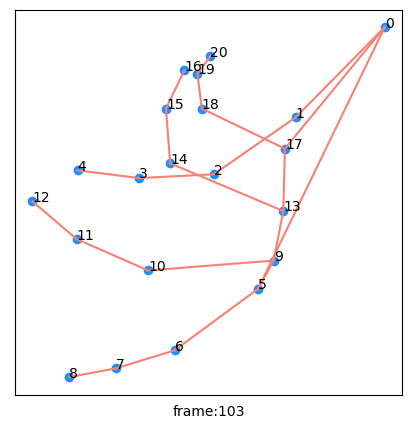

In [13]:
fig, ax = plt.subplots(1, figsize=(5,5))
print('Sign Text:' + str(sign_text))
visualize_hand_graph(sam_df_left_hand_df,sam_df_left_hand_df.frame.values[0], ax)

In [14]:
train_df.head()

,path,participant_id,sequence_id,sign,sign_as_int
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow,25
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait,232
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud,48
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird,23
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie,164


In [15]:
train_df.participant_id.unique()

array([26734, 28656, 16069, 25571, 62590, 32319, 37055, 29302, 49445,
       36257, 22343, 27610, 61333, 53618, 34503, 18796,  4718, 55372,
        2044, 37779, 30680])

In [16]:
len(train_df.sign.unique())

250

In [17]:
train_df.shape

(94477, 5)

In [18]:
# unique_frame_num_list =[]
# for i in range(len(train_df)):
#     df= pd.read_parquet('/kaggle/input/asl-signs/'+str(train_df.path[i]))
#     unique_frame_num_list.append(len(df['frame'].unique()))

In [19]:
# train_df['frame_num'] = unique_frame_num_list

In [20]:
train_df.head()

,path,participant_id,sequence_id,sign,sign_as_int
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow,25
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait,232
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud,48
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird,23
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie,164


In [21]:
train_df.to_csv('train_mod.csv',index=False)